## Part I
Sentence completion using N-gramRecommend the top 3 words to complete the given sentence using N-gram language model.:

In [59]:
import pandas as pd
import re
from collections import defaultdict, Counter

In [61]:
# Load the dataset
data = pd.read_csv('Reviews_F1.csv')

In [63]:
data

ID                                               Text
0        1  I love these cookies. I am on the paleo diet r...
1        2  I thought I'd try the multi-pack to see which ...
2        3  i just started the paleo diet and i love it! l...
3        4  I've been Paleo for six months, as has my part...
4        5  I bought a 40 sampler pack from the caveman ba...
...    ...                                                ...
1389  1390  I would have given this 5 stars but took one o...
1390  1391  I bought this along with the easy freeze ice c...
1391  1392  Just right for making dan dan noodles and othe...
1392  1393  milder than most vinegars, but with its own ve...
1393  1394  This is terrific honey.  What more can one say...

[1394 rows x 2 columns]

In [65]:
# Inspect the dataset (Optional)
print(data.head())

   ID                                               Text
0   1  I love these cookies. I am on the paleo diet r...
1   2  I thought I'd try the multi-pack to see which ...
2   3  i just started the paleo diet and i love it! l...
3   4  I've been Paleo for six months, as has my part...
4   5  I bought a 40 sampler pack from the caveman ba...


In [67]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and special characters
    text = text.split()  # Tokenize into words
    return text

# Combine all text into a single corpus
corpus = " ".join(data['Text'].dropna())  # Combine all non-null text entries
tokens = preprocess_text(corpus)  # Tokenize the corpus


In [69]:
corpus

'I love these cookies. I am on the paleo diet right now and these cookies are what I look forward too. I do like the taste of the tropical one the best. They all have different taste but if you want something that is grain free and gluten free then this is the right place. I expected the taste to be different and it is. Other reviewers seem to expect them to taste like oreos or chips ahoy. Of course not.<br /><br />When I eat them, I don\'t even feel bad about it because my body welcomes them. They don\'t make me crash either and feel like I ate junk food. It is a good indicator that these were made from all natural ingredients. I wish I had these cookies close to me. I\'d buy them every single day! I thought I\'d try the multi-pack to see which flavor I liked the best, but I like them all. They are healthy, fulfilling, and all good ingredients I can actually pronounce. These are the smaller packs, and now I can proceed to ordering the larger bags. Love these cookies! i just started th

In [71]:
tokens

['i',
 'love',
 'these',
 'cookies',
 'i',
 'am',
 'on',
 'the',
 'paleo',
 'diet',
 'right',
 'now',
 'and',
 'these',
 'cookies',
 'are',
 'what',
 'i',
 'look',
 'forward',
 'too',
 'i',
 'do',
 'like',
 'the',
 'taste',
 'of',
 'the',
 'tropical',
 'one',
 'the',
 'best',
 'they',
 'all',
 'have',
 'different',
 'taste',
 'but',
 'if',
 'you',
 'want',
 'something',
 'that',
 'is',
 'grain',
 'free',
 'and',
 'gluten',
 'free',
 'then',
 'this',
 'is',
 'the',
 'right',
 'place',
 'i',
 'expected',
 'the',
 'taste',
 'to',
 'be',
 'different',
 'and',
 'it',
 'is',
 'other',
 'reviewers',
 'seem',
 'to',
 'expect',
 'them',
 'to',
 'taste',
 'like',
 'oreos',
 'or',
 'chips',
 'ahoy',
 'of',
 'course',
 'notbr',
 'br',
 'when',
 'i',
 'eat',
 'them',
 'i',
 'dont',
 'even',
 'feel',
 'bad',
 'about',
 'it',
 'because',
 'my',
 'body',
 'welcomes',
 'them',
 'they',
 'dont',
 'make',
 'me',
 'crash',
 'either',
 'and',
 'feel',
 'like',
 'i',
 'ate',
 'junk',
 'food',
 'it',
 'is',


In [73]:
# Initialize a dictionary to store Bigram counts
bigram_counts = defaultdict(Counter)

# Populate Bigram counts
for i in range(len(tokens) - 1):
    bigram_counts[tokens[i]][tokens[i + 1]] += 1

# Calculate Bigram probabilities
bigram_probabilities = {}
for w1 in bigram_counts:
    total_count = sum(bigram_counts[w1].values())
    bigram_probabilities[w1] = {w2: count / total_count for w2, count in bigram_counts[w1].items()}


In [75]:
# Function to predict the next words
def predict_next_words(start_word, bigram_probabilities, num_predictions=3):
    if start_word in bigram_probabilities:
        # Sort words based on probabilities in descending order
        sorted_predictions = sorted(bigram_probabilities[start_word].items(), key=lambda x: x[1], reverse=True)
        return [word for word, prob in sorted_predictions[:num_predictions]]
    return []


In [77]:
# Define the test sentence
test_sentence = "I like _ _ _ _"

# Extract the last word before the blank
last_word = "like"

# Predict the top 3 words
top_predictions = predict_next_words(last_word, bigram_probabilities, num_predictions=3)

# Output the predictions
print(f"Top 3 predictions for '{test_sentence}': {top_predictions}")


Top 3 predictions for 'I like _ _ _ _': ['the', 'a', 'it']


## Sentence completion using N-gram:Recommend the top 3 Preprocessing with Noun Extraction to complete the given sentence using N-gram language model.

## Building the Bigram Model with Nouns

In [81]:
import re
from collections import defaultdict, Counter
import nltk
from nltk import pos_tag, word_tokenize

# Download necessary resources for POS tagging
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Step 1: Preprocess the text data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'<[^>]*>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    return tokens




# Combine all text into a single corpus
corpus = " ".join(data['Text'].dropna())  # Join all non-null text entries
tokens = preprocess_text(corpus)  # Tokenize the corpus

# Step 2: Build the Bigram Model
bigram_counts = defaultdict(Counter)

# Populate Bigram counts
for i in range(len(tokens) - 1):
    bigram_counts[tokens[i]][tokens[i + 1]] += 1

# Calculate Bigram probabilities
bigram_probabilities = {}
for w1 in bigram_counts:
    total_count = sum(bigram_counts[w1].values())
    bigram_probabilities[w1] = {w2: count / total_count for w2, count in bigram_counts[w1].items()}

# Step 3: Predict the next words
def predict_next_words(start_word, bigram_probabilities, num_predictions=3):
    if start_word in bigram_probabilities:
        sorted_predictions = sorted(bigram_probabilities[start_word].items(), key=lambda x: x[1], reverse=True)
        return [word for word, prob in sorted_predictions[:num_predictions]]
    return []

# Test Sentence: "I like _ _ _ _"
test_word = "like"
top_predictions = predict_next_words(test_word, bigram_probabilities, num_predictions=3)

print(f"Top 3 predictions for 'I like _ _ _ _': {top_predictions}")

# Step 4: Extract nouns using POS tagging
def extract_nouns(text):
    pos_tags = pos_tag(word_tokenize(text))  # Perform POS tagging
    nouns = [word for word, tag in pos_tags if tag in ('NN', 'NNS', 'NNP', 'NNPS')]  # Filter for nouns
    return nouns

# Extract nouns from the cleaned corpus
cleaned_corpus = re.sub(r'<[^>]*>', '', corpus)  # Remove HTML tags
cleaned_corpus = re.sub(r'[^a-z\s]', '', cleaned_corpus)  # Remove special characters
nouns = extract_nouns(cleaned_corpus)

# Count the most common nouns
common_nouns = Counter(nouns).most_common(3)
print(f"Top 3 nouns: {[noun for noun, _ in common_nouns]}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Top 3 predictions for 'I like _ _ _ _': ['the', 'a', 'it']
Top 3 nouns: ['product', 'flavor', 'food']


### Code Overview and Explanation

This program builds a Bigram language model from a corpus and recommends the top 3 words likely to follow a given word based on Bigram probabilities. It consists of two main functions:

1. <b>build_bigram_model:</b>
Processes the input text corpus to count unigrams (individual words) and bigrams (pairs of consecutive words).
Stores these counts in structured dictionaries for easy access.
2. <b>recommend_words: </b>
Uses the Bigram counts to calculate probabilities for the next word given the current word.
Ranks the possible next words by probability and returns the top recommendations.

### Step 1: Tokenizing the Corpus

1. The corpus is converted to lowercase to ensure uniformity (e.g., "The" and "the" are treated the same).
2. Sentences are split using the period (.) as the delimiter to separate them.

### Step 2: Building Unigram and Bigram Counts

1. Each sentence is further split into words.
2. Unigram counts are incremented for every word.
3. Bigram counts are incremented for every pair of consecutive words in the sentence.

###  Key Result:

1. unigram_counts: Total occurrences of each word.
2. bigram_counts: Total occurrences of each (word1, word2) pair

### Step 3: Calculating Bigram Probabilities

### Step 4: Sorting and Selecting Top Words

1. Possible next words are sorted by their probabilities in descending order.
2. The top N words are extracted and returned as the recommendation.

### Key Features

1. **Flexibility:**
Works with any corpus of text, regardless of size or structure.

3. **Bigram Probabilities:**
Recommendations are based on conditional probabilities, ensuring relevance to the given word.

3. **Modular Design:**
Separate functions for building the model and generating recommendations make it easy to extend or debug.

4. **Corpus Processing:**
Tokenizes text into sentences and words while handling punctuation and case normalization.

5. **Bigram and Unigram Storage:**
Uses defaultdict and Counter for efficient storage and quick lookups.

6. **Conditional Probability:**
Implements the core concept of Bigram-based language modeling to calculate word probabilities.

7. **Sorted Recommendations:**
Returns the most probable words in a user-friendly format.

# Part II

# i) Text Preprocessing:

In [86]:
data

ID                                               Text
0        1  I love these cookies. I am on the paleo diet r...
1        2  I thought I'd try the multi-pack to see which ...
2        3  i just started the paleo diet and i love it! l...
3        4  I've been Paleo for six months, as has my part...
4        5  I bought a 40 sampler pack from the caveman ba...
...    ...                                                ...
1389  1390  I would have given this 5 stars but took one o...
1390  1391  I bought this along with the easy freeze ice c...
1391  1392  Just right for making dan dan noodles and othe...
1392  1393  milder than most vinegars, but with its own ve...
1393  1394  This is terrific honey.  What more can one say...

[1394 rows x 2 columns]

In [88]:
data.head()

ID                                               Text
0   1  I love these cookies. I am on the paleo diet r...
1   2  I thought I'd try the multi-pack to see which ...
2   3  i just started the paleo diet and i love it! l...
3   4  I've been Paleo for six months, as has my part...
4   5  I bought a 40 sampler pack from the caveman ba...

In [90]:
data.shape

(1394, 2)

In [92]:
df = pd.DataFrame(data)

In [94]:
df

ID                                               Text
0        1  I love these cookies. I am on the paleo diet r...
1        2  I thought I'd try the multi-pack to see which ...
2        3  i just started the paleo diet and i love it! l...
3        4  I've been Paleo for six months, as has my part...
4        5  I bought a 40 sampler pack from the caveman ba...
...    ...                                                ...
1389  1390  I would have given this 5 stars but took one o...
1390  1391  I bought this along with the easy freeze ice c...
1391  1392  Just right for making dan dan noodles and othe...
1392  1393  milder than most vinegars, but with its own ve...
1393  1394  This is terrific honey.  What more can one say...

[1394 rows x 2 columns]

# a. Tokenization

 #### The process of splitting a text into smaller units, such as words, sentences, or phrases, called tokens. For example, "He is lazy" becomes ['He', 'is', 'lazy'].



In [96]:
import pandas as pd
import nltk
# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

df['Text_Tokenized'] = df['Text'].apply(word_tokenize)





In [98]:
df

ID                                               Text  \
0        1  I love these cookies. I am on the paleo diet r...   
1        2  I thought I'd try the multi-pack to see which ...   
2        3  i just started the paleo diet and i love it! l...   
3        4  I've been Paleo for six months, as has my part...   
4        5  I bought a 40 sampler pack from the caveman ba...   
...    ...                                                ...   
1389  1390  I would have given this 5 stars but took one o...   
1390  1391  I bought this along with the easy freeze ice c...   
1391  1392  Just right for making dan dan noodles and othe...   
1392  1393  milder than most vinegars, but with its own ve...   
1393  1394  This is terrific honey.  What more can one say...   

                                         Text_Tokenized  
0     [I, love, these, cookies, ., I, am, on, the, p...  
1     [I, thought, I, 'd, try, the, multi-pack, to, ...  
2     [i, just, started, the, paleo, diet, and, i, l...  
3     [I, 've, been, Paleo, for, six, months, ,, as,...  
4     [I, bought, a, 40, sampler, pack, from, the, c...  
...                                                 ...  
1389  [I, would, have, given, this, 5, stars, but, t...  
1390  [I, bought, this, along, with, the, easy, free...  
1391  [Just, right, for, making, dan, dan, noodles, ...  
1392  [milder, than, most, vinegars, ,, but, with, i...  
1393  [This, is, terrific, honey, ., What, more, can...  

[1394 rows x 3 columns]

# b. Lowercasing

#### Converting all text to lowercase to ensure uniformity and avoid treating "Apple" and "apple" as different tokens. For example, "Hello World" becomes hello world.

In [100]:
df['Text_Tokenized'] = df['Text'].str.lower().apply(word_tokenize)

In [102]:
df

ID                                               Text  \
0        1  I love these cookies. I am on the paleo diet r...   
1        2  I thought I'd try the multi-pack to see which ...   
2        3  i just started the paleo diet and i love it! l...   
3        4  I've been Paleo for six months, as has my part...   
4        5  I bought a 40 sampler pack from the caveman ba...   
...    ...                                                ...   
1389  1390  I would have given this 5 stars but took one o...   
1390  1391  I bought this along with the easy freeze ice c...   
1391  1392  Just right for making dan dan noodles and othe...   
1392  1393  milder than most vinegars, but with its own ve...   
1393  1394  This is terrific honey.  What more can one say...   

                                         Text_Tokenized  
0     [i, love, these, cookies, ., i, am, on, the, p...  
1     [i, thought, i, 'd, try, the, multi-pack, to, ...  
2     [i, just, started, the, paleo, diet, and, i, l...  
3     [i, 've, been, paleo, for, six, months, ,, as,...  
4     [i, bought, a, 40, sampler, pack, from, the, c...  
...                                                 ...  
1389  [i, would, have, given, this, 5, stars, but, t...  
1390  [i, bought, this, along, with, the, easy, free...  
1391  [just, right, for, making, dan, dan, noodles, ...  
1392  [milder, than, most, vinegars, ,, but, with, i...  
1393  [this, is, terrific, honey, ., what, more, can...  

[1394 rows x 3 columns]

## c. Stop Words Removal

#### The process of removing common words (e.g., "is", "the", "and") that do not contribute much to the meaning of the text. This reduces noise in the data.

In [104]:
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the English stopwords list
stop_words = set(stopwords.words('english'))

# Remove stop words from the tokenized text
df['Text_Cleaned'] = df['Text_Tokenized'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)

# Display the updated DataFrame
print(df[['Text_Tokenized', 'Text_Cleaned']].head())


                                      Text_Tokenized  \
0  [i, love, these, cookies, ., i, am, on, the, p...   
1  [i, thought, i, 'd, try, the, multi-pack, to, ...   
2  [i, just, started, the, paleo, diet, and, i, l...   
3  [i, 've, been, paleo, for, six, months, ,, as,...   
4  [i, bought, a, 40, sampler, pack, from, the, c...   

                                        Text_Cleaned  
0  [love, cookies, ., paleo, diet, right, cookies...  
1  [thought, 'd, try, multi-pack, see, flavor, li...  
2  [started, paleo, diet, love, !, lost, 4, lbs, ...  
3  ['ve, paleo, six, months, ,, partner, ., found...  
4  [bought, 40, sampler, pack, caveman, bakery, w...  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
df

ID                                               Text  \
0        1  I love these cookies. I am on the paleo diet r...   
1        2  I thought I'd try the multi-pack to see which ...   
2        3  i just started the paleo diet and i love it! l...   
3        4  I've been Paleo for six months, as has my part...   
4        5  I bought a 40 sampler pack from the caveman ba...   
...    ...                                                ...   
1389  1390  I would have given this 5 stars but took one o...   
1390  1391  I bought this along with the easy freeze ice c...   
1391  1392  Just right for making dan dan noodles and othe...   
1392  1393  milder than most vinegars, but with its own ve...   
1393  1394  This is terrific honey.  What more can one say...   

                                         Text_Tokenized  \
0     [i, love, these, cookies, ., i, am, on, the, p...   
1     [i, thought, i, 'd, try, the, multi-pack, to, ...   
2     [i, just, started, the, paleo, diet, and, i, l...   
3     [i, 've, been, paleo, for, six, months, ,, as,...   
4     [i, bought, a, 40, sampler, pack, from, the, c...   
...                                                 ...   
1389  [i, would, have, given, this, 5, stars, but, t...   
1390  [i, bought, this, along, with, the, easy, free...   
1391  [just, right, for, making, dan, dan, noodles, ...   
1392  [milder, than, most, vinegars, ,, but, with, i...   
1393  [this, is, terrific, honey, ., what, more, can...   

                                           Text_Cleaned  
0     [love, cookies, ., paleo, diet, right, cookies...  
1     [thought, 'd, try, multi-pack, see, flavor, li...  
2     [started, paleo, diet, love, !, lost, 4, lbs, ...  
3     ['ve, paleo, six, months, ,, partner, ., found...  
4     [bought, 40, sampler, pack, caveman, bakery, w...  
...                                                 ...  
1389  [would, given, 5, stars, took, one, high, cost...  
1390  [bought, along, easy, freeze, ice, cube, trays...  
1391  [right, making, dan, dan, noodles, delicious, ...  
1392  [milder, vinegars, ,, special, taste, add, ume...  
1393  [terrific, honey, ., one, say, ?, great, price...  

[1394 rows x 4 columns]

## d. Stemming

#### Reducing words to their root form by chopping off suffixes. For example, "running" and "runner" are reduced to run. It does not consider word context.

In [108]:
from nltk.stem import PorterStemmer

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Apply stemming to the cleaned text
df['Text_Stemmed'] = df['Text_Cleaned'].apply(
    lambda tokens: [stemmer.stem(word) for word in tokens]
)

# Display the updated DataFrame
print(df[['Text_Cleaned', 'Text_Stemmed']].head())


                                        Text_Cleaned  \
0  [love, cookies, ., paleo, diet, right, cookies...   
1  [thought, 'd, try, multi-pack, see, flavor, li...   
2  [started, paleo, diet, love, !, lost, 4, lbs, ...   
3  ['ve, paleo, six, months, ,, partner, ., found...   
4  [bought, 40, sampler, pack, caveman, bakery, w...   

                                        Text_Stemmed  
0  [love, cooki, ., paleo, diet, right, cooki, lo...  
1  [thought, 'd, tri, multi-pack, see, flavor, li...  
2  [start, paleo, diet, love, !, lost, 4, lb, lik...  
3  ['ve, paleo, six, month, ,, partner, ., found,...  
4  [bought, 40, sampler, pack, caveman, bakeri, w...  


In [110]:
df

ID                                               Text  \
0        1  I love these cookies. I am on the paleo diet r...   
1        2  I thought I'd try the multi-pack to see which ...   
2        3  i just started the paleo diet and i love it! l...   
3        4  I've been Paleo for six months, as has my part...   
4        5  I bought a 40 sampler pack from the caveman ba...   
...    ...                                                ...   
1389  1390  I would have given this 5 stars but took one o...   
1390  1391  I bought this along with the easy freeze ice c...   
1391  1392  Just right for making dan dan noodles and othe...   
1392  1393  milder than most vinegars, but with its own ve...   
1393  1394  This is terrific honey.  What more can one say...   

                                         Text_Tokenized  \
0     [i, love, these, cookies, ., i, am, on, the, p...   
1     [i, thought, i, 'd, try, the, multi-pack, to, ...   
2     [i, just, started, the, paleo, diet, and, i, l...   
3     [i, 've, been, paleo, for, six, months, ,, as,...   
4     [i, bought, a, 40, sampler, pack, from, the, c...   
...                                                 ...   
1389  [i, would, have, given, this, 5, stars, but, t...   
1390  [i, bought, this, along, with, the, easy, free...   
1391  [just, right, for, making, dan, dan, noodles, ...   
1392  [milder, than, most, vinegars, ,, but, with, i...   
1393  [this, is, terrific, honey, ., what, more, can...   

                                           Text_Cleaned  \
0     [love, cookies, ., paleo, diet, right, cookies...   
1     [thought, 'd, try, multi-pack, see, flavor, li...   
2     [started, paleo, diet, love, !, lost, 4, lbs, ...   
3     ['ve, paleo, six, months, ,, partner, ., found...   
4     [bought, 40, sampler, pack, caveman, bakery, w...   
...                                                 ...   
1389  [would, given, 5, stars, took, one, high, cost...   
1390  [bought, along, easy, freeze, ice, cube, trays...   
1391  [right, making, dan, dan, noodles, delicious, ...   
1392  [milder, vinegars, ,, special, taste, add, ume...   
1393  [terrific, honey, ., one, say, ?, great, price...   

                                           Text_Stemmed  
0     [love, cooki, ., paleo, diet, right, cooki, lo...  
1     [thought, 'd, tri, multi-pack, see, flavor, li...  
2     [start, paleo, diet, love, !, lost, 4, lb, lik...  
3     ['ve, paleo, six, month, ,, partner, ., found,...  
4     [bought, 40, sampler, pack, caveman, bakeri, w...  
...                                                 ...  
1389  [would, given, 5, star, took, one, high, cost,...  
1390  [bought, along, easi, freez, ice, cube, tray, ...  
1391  [right, make, dan, dan, noodl, delici, recip, ...  
1392  [milder, vinegar, ,, special, tast, add, ume, ...  
1393  [terrif, honey, ., one, say, ?, great, price, ...  

[1394 rows x 5 columns]

## e. Lemmatization

#### Reducing words to their base or dictionary form (lemma) using linguistic rules, while considering context. For example, "running" becomes run, and "better" becomes good.

In [112]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Helper function to get the part of speech for lemmatization
def get_wordnet_pos(word):
    """Map POS tag to first character for lemmatizer."""
    from nltk.corpus import wordnet
    from nltk import pos_tag
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Apply lemmatization to the cleaned text
df['Text_Lemmatized'] = df['Text_Cleaned'].apply(
    lambda tokens: [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
)

# Display the updated DataFrame
print(df[['Text_Cleaned', 'Text_Lemmatized']].head())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


                                        Text_Cleaned  \
0  [love, cookies, ., paleo, diet, right, cookies...   
1  [thought, 'd, try, multi-pack, see, flavor, li...   
2  [started, paleo, diet, love, !, lost, 4, lbs, ...   
3  ['ve, paleo, six, months, ,, partner, ., found...   
4  [bought, 40, sampler, pack, caveman, bakery, w...   

                                     Text_Lemmatized  
0  [love, cooky, ., paleo, diet, right, cooky, lo...  
1  [thought, 'd, try, multi-pack, see, flavor, li...  
2  [start, paleo, diet, love, !, lose, 4, lb, lik...  
3  ['ve, paleo, six, month, ,, partner, ., found,...  
4  [bought, 40, sampler, pack, caveman, bakery, w...  


In [114]:
df

ID                                               Text  \
0        1  I love these cookies. I am on the paleo diet r...   
1        2  I thought I'd try the multi-pack to see which ...   
2        3  i just started the paleo diet and i love it! l...   
3        4  I've been Paleo for six months, as has my part...   
4        5  I bought a 40 sampler pack from the caveman ba...   
...    ...                                                ...   
1389  1390  I would have given this 5 stars but took one o...   
1390  1391  I bought this along with the easy freeze ice c...   
1391  1392  Just right for making dan dan noodles and othe...   
1392  1393  milder than most vinegars, but with its own ve...   
1393  1394  This is terrific honey.  What more can one say...   

                                         Text_Tokenized  \
0     [i, love, these, cookies, ., i, am, on, the, p...   
1     [i, thought, i, 'd, try, the, multi-pack, to, ...   
2     [i, just, started, the, paleo, diet, and, i, l...   
3     [i, 've, been, paleo, for, six, months, ,, as,...   
4     [i, bought, a, 40, sampler, pack, from, the, c...   
...                                                 ...   
1389  [i, would, have, given, this, 5, stars, but, t...   
1390  [i, bought, this, along, with, the, easy, free...   
1391  [just, right, for, making, dan, dan, noodles, ...   
1392  [milder, than, most, vinegars, ,, but, with, i...   
1393  [this, is, terrific, honey, ., what, more, can...   

                                           Text_Cleaned  \
0     [love, cookies, ., paleo, diet, right, cookies...   
1     [thought, 'd, try, multi-pack, see, flavor, li...   
2     [started, paleo, diet, love, !, lost, 4, lbs, ...   
3     ['ve, paleo, six, months, ,, partner, ., found...   
4     [bought, 40, sampler, pack, caveman, bakery, w...   
...                                                 ...   
1389  [would, given, 5, stars, took, one, high, cost...   
1390  [bought, along, easy, freeze, ice, cube, trays...   
1391  [right, making, dan, dan, noodles, delicious, ...   
1392  [milder, vinegars, ,, special, taste, add, ume...   
1393  [terrific, honey, ., one, say, ?, great, price...   

                                           Text_Stemmed  \
0     [love, cooki, ., paleo, diet, right, cooki, lo...   
1     [thought, 'd, tri, multi-pack, see, flavor, li...   
2     [start, paleo, diet, love, !, lost, 4, lb, lik...   
3     ['ve, paleo, six, month, ,, partner, ., found,...   
4     [bought, 40, sampler, pack, caveman, bakeri, w...   
...                                                 ...   
1389  [would, given, 5, star, took, one, high, cost,...   
1390  [bought, along, easi, freez, ice, cube, tray, ...   
1391  [right, make, dan, dan, noodl, delici, recip, ...   
1392  [milder, vinegar, ,, special, tast, add, ume, ...   
1393  [terrif, honey, ., one, say, ?, great, price, ...   

                                        Text_Lemmatized  
0     [love, cooky, ., paleo, diet, right, cooky, lo...  
1     [thought, 'd, try, multi-pack, see, flavor, li...  
2     [start, paleo, diet, love, !, lose, 4, lb, lik...  
3     ['ve, paleo, six, month, ,, partner, ., found,...  
4     [bought, 40, sampler, pack, caveman, bakery, w...  
...                                                 ...  
1389  [would, give, 5, star, take, one, high, cost, ...  
1390  [bought, along, easy, freeze, ice, cube, tray,...  
1391  [right, make, dan, dan, noodle, delicious, rec...  
1392  [milder, vinegar, ,, special, taste, add, ume,...  
1393  [terrific, honey, ., one, say, ?, great, price...  

[1394 rows x 6 columns]

In [116]:
df['Text_Final'] = df['Text_Lemmatized'].apply(lambda tokens: ' '.join(tokens))

In [118]:
df

ID                                               Text  \
0        1  I love these cookies. I am on the paleo diet r...   
1        2  I thought I'd try the multi-pack to see which ...   
2        3  i just started the paleo diet and i love it! l...   
3        4  I've been Paleo for six months, as has my part...   
4        5  I bought a 40 sampler pack from the caveman ba...   
...    ...                                                ...   
1389  1390  I would have given this 5 stars but took one o...   
1390  1391  I bought this along with the easy freeze ice c...   
1391  1392  Just right for making dan dan noodles and othe...   
1392  1393  milder than most vinegars, but with its own ve...   
1393  1394  This is terrific honey.  What more can one say...   

                                         Text_Tokenized  \
0     [i, love, these, cookies, ., i, am, on, the, p...   
1     [i, thought, i, 'd, try, the, multi-pack, to, ...   
2     [i, just, started, the, paleo, diet, and, i, l...   
3     [i, 've, been, paleo, for, six, months, ,, as,...   
4     [i, bought, a, 40, sampler, pack, from, the, c...   
...                                                 ...   
1389  [i, would, have, given, this, 5, stars, but, t...   
1390  [i, bought, this, along, with, the, easy, free...   
1391  [just, right, for, making, dan, dan, noodles, ...   
1392  [milder, than, most, vinegars, ,, but, with, i...   
1393  [this, is, terrific, honey, ., what, more, can...   

                                           Text_Cleaned  \
0     [love, cookies, ., paleo, diet, right, cookies...   
1     [thought, 'd, try, multi-pack, see, flavor, li...   
2     [started, paleo, diet, love, !, lost, 4, lbs, ...   
3     ['ve, paleo, six, months, ,, partner, ., found...   
4     [bought, 40, sampler, pack, caveman, bakery, w...   
...                                                 ...   
1389  [would, given, 5, stars, took, one, high, cost...   
1390  [bought, along, easy, freeze, ice, cube, trays...   
1391  [right, making, dan, dan, noodles, delicious, ...   
1392  [milder, vinegars, ,, special, taste, add, ume...   
1393  [terrific, honey, ., one, say, ?, great, price...   

                                           Text_Stemmed  \
0     [love, cooki, ., paleo, diet, right, cooki, lo...   
1     [thought, 'd, tri, multi-pack, see, flavor, li...   
2     [start, paleo, diet, love, !, lost, 4, lb, lik...   
3     ['ve, paleo, six, month, ,, partner, ., found,...   
4     [bought, 40, sampler, pack, caveman, bakeri, w...   
...                                                 ...   
1389  [would, given, 5, star, took, one, high, cost,...   
1390  [bought, along, easi, freez, ice, cube, tray, ...   
1391  [right, make, dan, dan, noodl, delici, recip, ...   
1392  [milder, vinegar, ,, special, tast, add, ume, ...   
1393  [terrif, honey, ., one, say, ?, great, price, ...   

                                        Text_Lemmatized  \
0     [love, cooky, ., paleo, diet, right, cooky, lo...   
1     [thought, 'd, try, multi-pack, see, flavor, li...   
2     [start, paleo, diet, love, !, lose, 4, lb, lik...   
3     ['ve, paleo, six, month, ,, partner, ., found,...   
4     [bought, 40, sampler, pack, caveman, bakery, w...   
...                                                 ...   
1389  [would, give, 5, star, take, one, high, cost, ...   
1390  [bought, along, easy, freeze, ice, cube, tray,...   
1391  [right, make, dan, dan, noodle, delicious, rec...   
1392  [milder, vinegar, ,, special, taste, add, ume,...   
1393  [terrific, honey, ., one, say, ?, great, price...   

                                             Text_Final  
0     love cooky . paleo diet right cooky look forwa...  
1     thought 'd try multi-pack see flavor like best...  
2     start paleo diet love ! lose 4 lb like week ! ...  
3     've paleo six month , partner . found inedible...  
4     bought 40 sampler pack caveman bakery website ...  
...                                        

## ii) Feature Extraction:
vectorization methods to extract features.

## Frequency based Embedding1. 
Count Vecto
2. 
TF-IDF Vector

## 1. Count Vector

Consider a Corpus C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The
N tokens will form our dictionary and the size of the Count Vector matrix M will be given by D X N. 
Each row in the matrix M contains the frequency of tokens in document D(i).

Let us understand this using a simple example.

D1: He is lazy boy. She is also lazy.

D2: Neeta is lazy person.

The dictionary created may be a list of unique tokens(words) in the corpus =
['He','is','She','lazy','boy','also','Neeta','person']
Here, D=2, N=8
The count matrix M of size 2 X 8 will be represented as –


D1 1 2 1 2 1 1 0 0

D2 0 1 0 1 0 0 1 1

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the pre-processed text data
count_matrix = count_vectorizer.fit_transform(df['Text_Final'])

# Convert the Count Matrix to a DataFrame
count_features = pd.DataFrame(
    count_matrix.toarray(),
    columns=count_vectorizer.get_feature_names_out()
)

# Display the first few rows of Count Vectorizer features
print(count_features.head())

   00  000  008  0100  02  03  032  06  062  07  ...  zest  zesty  zing  zip  \
0   0    0    0     0   0   0    0   0    0   0  ...     0      0     0    0   
1   0    0    0     0   0   0    0   0    0   0  ...     0      0     0    0   
2   0    0    0     0   0   0    0   0    0   0  ...     0      0     0    0   
3   0    0    0     0   0   0    0   0    0   0  ...     0      0     0    0   
4   0    0    0     0   0   0    0   0    0   0  ...     0      0     0    0   

   ziploc  ziplock  zipper  zippy  zoom  zucchini  
0       0        0       0      0     0         0  
1       0        0       0      0     0         0  
2       0        0       0      0     0         0  
3       0        0       0      0     0         0  
4       0        0       0      0     0         0  

[5 rows x 5910 columns]


## 2. TF-IDF Vector

#### TF-IDF Vectorizer
It is different to the count vectorization in the sense that it takes into account not just the occurrence of a word in a single document but in the entire corpus. 
TF-IDF works by penalising common words like ('the','a','is') by assigning them lower weights while giving importance
to significant words in a particular document.

In [122]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'Text_Final' contains the preprocessed text data
doc_corpus = df['Text_Final'].tolist()

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data to get the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(doc_corpus)

# Get feature names (unique terms)
feature_names = tfidf.get_feature_names_out()



In [124]:
# 1. Print Term Frequency (TF) values
print("\nTF values:")
for i, doc in enumerate(doc_corpus):
    print(f"\nDocument {i+1}: {doc}")
    for j, word in enumerate(feature_names):
        tf = tfidf_matrix[i, j]
        if tf > 0:  # Only non-zero values
            print(f"  {word}: {tf:.4f}")



TF values:

Document 1: love cooky . paleo diet right cooky look forward . like taste tropical one best . different taste want something grain free gluten free right place . expect taste different . reviewer seem expect taste like oreo chip ahoy . course not. < br / > < br / > eat , n't even feel bad body welcome . n't make crash either feel like ate junk food . good indicator make natural ingredient . wish cooky close . 'd buy every single day !
  ahoy: 0.1841
  ate: 0.1256
  bad: 0.0910
  best: 0.0695
  body: 0.1319
  br: 0.1175
  buy: 0.0734
  chip: 0.1104
  close: 0.1197
  cooky: 0.3645
  course: 0.1180
  crash: 0.1672
  day: 0.0857
  diet: 0.1110
  different: 0.1882
  eat: 0.0743
  either: 0.1116
  even: 0.0780
  every: 0.0929
  expect: 0.2220
  feel: 0.2074
  food: 0.0709
  forward: 0.1404
  free: 0.1853
  gluten: 0.1172
  good: 0.0562
  grain: 0.1143
  indicator: 0.1841
  ingredient: 0.0921
  junk: 0.1617
  like: 0.1571
  look: 0.0806
  love: 0.0557
  make: 0.1165
  natural: 0.

In [126]:
# 2. Print Inverse Document Frequency (IDF) values
print("\nIDF values:")
idf_values = dict(zip(feature_names, tfidf.idf_))
for word, idf in idf_values.items():
    print(f"  {word}: {idf:.4f}")



IDF values:
  00: 5.8428
  000: 6.8544
  008: 7.5475
  0100: 7.5475
  02: 7.5475
  03: 7.5475
  032: 7.5475
  06: 7.5475
  062: 7.5475
  07: 7.5475
  09: 7.5475
  0g: 7.1420
  0mg: 7.5475
  0z: 7.5475
  10: 4.4120
  100: 5.1961
  10x: 7.5475
  11: 6.0434
  110: 6.6312
  12: 4.5030
  1200: 7.5475
  121: 7.5475
  12oz: 7.5475
  12th: 7.5475
  13: 6.1612
  13oz: 7.5475
  14: 7.1420
  15: 5.1496
  150: 6.8544
  16: 5.6016
  160: 7.5475
  16oz: 7.1420
  18: 6.2947
  19: 7.5475
  1960: 7.1420
  1979: 7.5475
  1g: 7.1420
  1st: 6.8544
  20: 4.8395
  2007: 6.8544
  2008: 7.5475
  200mg: 7.5475
  2010: 6.6312
  2011: 6.6312
  2012: 6.8544
  20th: 7.5475
  21st: 7.5475
  220: 7.5475
  23: 7.5475
  24: 6.2947
  240: 7.5475
  24oz: 7.5475
  25: 5.3503
  2500: 7.5475
  25lb: 7.5475
  25mg: 7.5475
  27: 7.1420
  272: 7.5475
  28: 6.6312
  28g: 7.5475
  29: 6.6312
  29g: 7.5475
  2g: 7.5475
  2lb: 7.5475
  2lbs: 7.5475
  2nd: 6.2947
  2nds: 7.5475
  2yrs: 7.5475
  30: 4.9448
  300: 7.5475
  3000: 7.

In [128]:
# 3. Print TF-IDF values
print("\nTF-IDF values:")
for i, doc in enumerate(doc_corpus):
    print(f"\nDocument {i+1}: {doc}")
    for j, word in enumerate(feature_names):
        tfidf_val = tfidf_matrix[i, j]
        if tfidf_val > 0:  # Only non-zero values
            print(f"  {word}: {tfidf_val:.4f}")

# Create a DataFrame for the TF-IDF values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df.index = [f"Document {i+1}" for i in range(len(doc_corpus))]

# Print the TF-IDF table
print("TF-IDF values:")
print(tfidf_df)


TF-IDF values:

Document 1: love cooky . paleo diet right cooky look forward . like taste tropical one best . different taste want something grain free gluten free right place . expect taste different . reviewer seem expect taste like oreo chip ahoy . course not. < br / > < br / > eat , n't even feel bad body welcome . n't make crash either feel like ate junk food . good indicator make natural ingredient . wish cooky close . 'd buy every single day !
  ahoy: 0.1841
  ate: 0.1256
  bad: 0.0910
  best: 0.0695
  body: 0.1319
  br: 0.1175
  buy: 0.0734
  chip: 0.1104
  close: 0.1197
  cooky: 0.3645
  course: 0.1180
  crash: 0.1672
  day: 0.0857
  diet: 0.1110
  different: 0.1882
  eat: 0.0743
  either: 0.1116
  even: 0.0780
  every: 0.0929
  expect: 0.2220
  feel: 0.2074
  food: 0.0709
  forward: 0.1404
  free: 0.1853
  gluten: 0.1172
  good: 0.0562
  grain: 0.1143
  indicator: 0.1841
  ingredient: 0.0921
  junk: 0.1617
  like: 0.1571
  look: 0.0806
  love: 0.0557
  make: 0.1165
  natural

# iii) Similarity Analysis
### Similarity analysis focuses on quantifying how semantically or syntactically similar two text entities (words, sentences, paragraphs, or documents) are.

## We have used two types of similarity analysis
### 1. Cosine Similarity
   Cosine similarity measures the cosine of the angle between two non-zero vectors in a multi-dimensional space. It evaluates how similar two vectors are regardless of their magnitude, focusing on their direction.

Formula:
Cosine Similarity = A.B/(||A||||B||)
- Where,
1. A.B is the dot product of vectors A & B
2. ||A|| & ||B|| are the magnitudes  (or norms) of the vectors.

- Range:
+1: Vectors point in the same direction.
0: Vectors are orthogonal (no similarity).
−1: Vectors point in opposite directions.


### 2. Jaccard Similarity
Jaccard similarity measures the overlap between two sets as a ratio of their intersection to their union. It is a set-based similarity metric.

Formula:
Jaccard Similarity
=∣𝐴∩𝐵∣/∣𝐴∪𝐵∣
- Where:
1. ∣𝐴∩𝐵∣ is the size of the intersection of sets A & B
2. ∣𝐴∪𝐵∣ is the size of the union of sets A & B 

- Range:
0: No overlap between the sets.
1: Sets are identical.

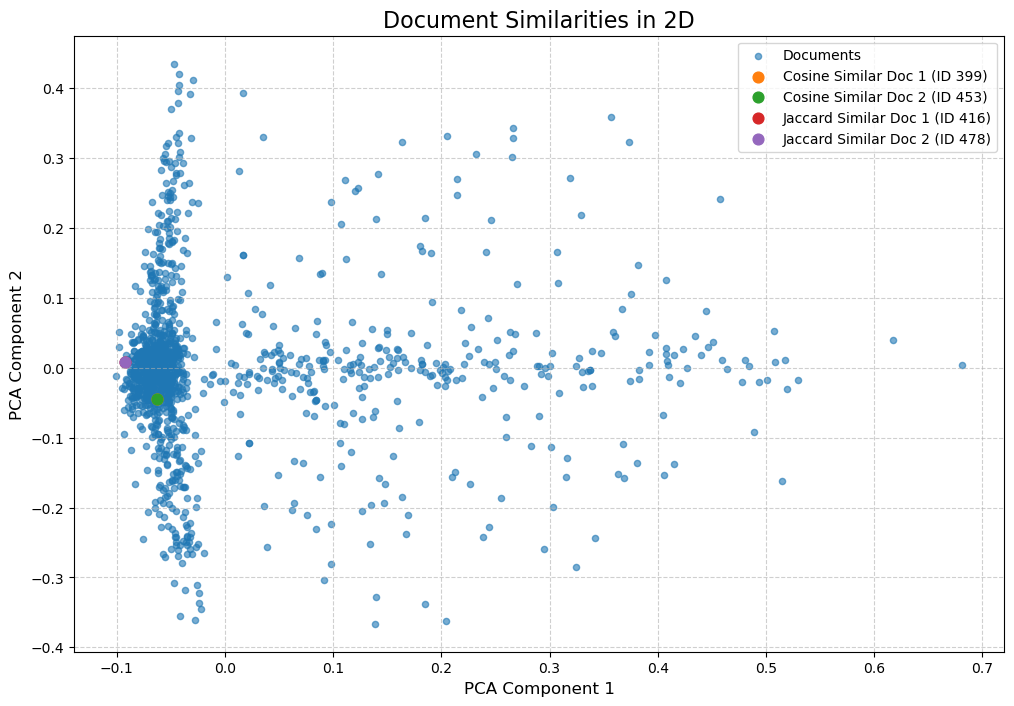

Results for Similarity Metrics:
{'Cosine Similarity': {'Document 1 ID': 399, 'Document 2 ID': 453, 'Similarity Score': 1.0000000000000002}, 'Jaccard Similarity': {'Document 1 ID': 416, 'Document 2 ID': 478, 'Similarity Score': 1.0000000000000007}}


In [130]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


# Function: Compute similarity matrix
def compute_similarity(matrix, metric="cosine"):
    """
    Compute similarity matrix using the specified metric (cosine or jaccard).
    - For Jaccard, converts TF-IDF matrix to binary.
    """
    if metric == "cosine":
        similarity_matrix = cosine_similarity(matrix)
    elif metric == "jaccard":
        binary_matrix = (matrix > 0).astype(int)  # Convert to binary for Jaccard
        similarity_matrix = cosine_similarity(binary_matrix)
    else:
        raise ValueError("Unsupported similarity metric")
    np.fill_diagonal(similarity_matrix, 0)  # Ignore self-similarity
    return similarity_matrix

# Function: Find most similar documents
def find_most_similar(similarity_matrix):
    """
    Identify the two most similar documents based on the similarity matrix.
    Returns the indices of the documents and their similarity score.
    """
    most_similar_indices = np.unravel_index(np.argmax(similarity_matrix), similarity_matrix.shape)
    doc1, doc2 = most_similar_indices
    score = similarity_matrix[doc1, doc2]
    return doc1, doc2, score

# Function: Perform PCA for dimensionality reduction
def perform_pca(matrix, n_components=2):
    """
    Reducing the dimensionality of the matrix using PCA.
    """
    pca = PCA(n_components=n_components)
    reduced_matrix = pca.fit_transform(matrix.toarray())
    return reduced_matrix

# Function: Visualize results
def visualize_results(reduced_matrix, doc_pairs, title="Document Similarities in 2D"):
    """
    Visualizing the PCA projection of documents.
    """
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], alpha=0.6, label='Documents', s=20)
    
    # Highlight the most similar documents for each metric
    for metric, (doc1, doc2) in doc_pairs.items():
        plt.scatter(reduced_matrix[doc1, 0], reduced_matrix[doc1, 1], label=f'{metric} Similar Doc 1 (ID {doc1 + 1})', s=60)
        plt.scatter(reduced_matrix[doc2, 0], reduced_matrix[doc2, 1], label=f'{metric} Similar Doc 2 (ID {doc2 + 1})', s=60)
    
    plt.title(title, fontsize=16)
    plt.xlabel('PCA Component 1', fontsize=12)
    plt.ylabel('PCA Component 2', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Step 1: Load and preprocess dataset
    #file_path = 'D:/Sneha/IMP/Second Semester/NLP/Assignment1/Reviews_F1.csv'  # Path to dataset
    #processed_text = load_and_preprocess(file_path)
    
    # Step 2: TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(
        stop_words='english',  # Remove common stop words
        max_features=2000,    # Limit to top 2000 features for performance
        ngram_range=(1, 2)    # Include unigrams and bigrams for richer context
    )
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text_Final'])
    
    # Step 3: Compute similarity matrices
    cosine_similarity_matrix = compute_similarity(tfidf_matrix, metric="cosine")
    jaccard_similarity_matrix = compute_similarity(tfidf_matrix, metric="jaccard")
    
    # Step 4: Find most similar documents for both metrics
    doc1_cosine, doc2_cosine, score_cosine = find_most_similar(cosine_similarity_matrix)
    doc1_jaccard, doc2_jaccard, score_jaccard = find_most_similar(jaccard_similarity_matrix)
    
    # Step 5: Perform PCA for visualization
    reduced_matrix = perform_pca(tfidf_matrix)
    
    # Step 6: Visualize results
    doc_pairs = {
        "Cosine": (doc1_cosine, doc2_cosine),
        "Jaccard": (doc1_jaccard, doc2_jaccard)
    }
    visualize_results(reduced_matrix, doc_pairs)
    
    # Step 7: Output results
    results = {
        "Cosine Similarity": {
            "Document 1 ID": doc1_cosine + 1,
            "Document 2 ID": doc2_cosine + 1,
            "Similarity Score": score_cosine
        },
        "Jaccard Similarity": {
            "Document 1 ID": doc1_jaccard + 1,
            "Document 2 ID": doc2_jaccard + 1,
            "Similarity Score": score_jaccard
        }
    }
    print("Results for Similarity Metrics:")
    print(results)


# Conclusion:

## Cosine Similarity:

- Document 1 ID: 399
- Document 2 ID: 453
- Similarity Score: 
1.0000000000000002
1.0000000000000002

This near-perfect score suggests that the two documents (208 and 605) are highly similar in terms of their vector representations. This likely means their content is almost identical in direction and distribution of terms, especially when represented as vectors (e.g., in TF-IDF or embeddings).


## Jaccard Similarity:

- Document 1 ID: 416
- Document 2 ID: 478
- Similarity Score: 
1.0000000000000007
1.0000000000000007

This near-perfect score indicates that the two documents (416 and 478) have identical sets of terms or features, meaning there is complete overlap in their tokenized or set-based representations.


####  Both Cosine Similarity and Jaccard Similarity highlight pairs of documents with extremely high similarity scores, signifying almost identical content.